# **Archisha Sinha**
## Domain: Natural Language Processings
## Topic: Sentiment Analysis

In [1]:
import nltk

## a. Access text from web

In [35]:
from urllib import request
url = "https://www.gutenberg.org/cache/epub/71512/pg71512.txt"
#stirring SCENES IN SAVAGE LANDS BY JAMES GREENWOOD

response = request.urlopen(url)
book = response.read().decode('utf8')
print(type(book))

print(len(book))

print(book[1000:1200])


<class 'str'>
1131208
y The Internet Archive)


*** START OF THE PROJECT GUTENBERG EBOOK STIRRING SCENES IN SAVAGE LANDS ***


                               BEETON’S

                      ERCKMANN-CHATRIAN LIBRAR


## TEXT PREPROCESSING( single fn)

In [36]:
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
Stop_words= set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mpstme.student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
def preprocessing(sentence):
    
    # Use NLTK's word_tokenize to tokenize the text into words
    words = nltk.word_tokenize(sentence)
    
    # Remove punctuation tokens
    words_without_punct = [word for word in words if word not in string.punctuation]
    
    # Remove Stop Words
    sentence_new= []
    for words in words_without_punct:
        if words not in Stop_words:
            sentence_new.append(words)
            
    return(sentence_new)

In [38]:
book_new=preprocessing(book.lower())

In [39]:
print(book_new)

['\ufeffthe', 'project', 'gutenberg', 'ebook', 'stirring', 'scenes', 'savage', 'lands', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'states', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 're-use', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'www.gutenberg.org', 'located', 'united', 'states', 'check', 'laws', 'country', 'located', 'using', 'ebook', 'title', 'stirring', 'scenes', 'savage', 'lands', 'account', 'manners', 'customs', 'habits', 'recreations', 'peaceful', 'warlike', 'uncivilised', 'world', 'author', 'james', 'greenwood', 'release', 'date', 'august', '28', '2023', 'ebook', '71512', 'language', 'english', 'original', 'publication', 'london', 'ward', 'locke', 'co', '1865', 'credits', 'brian', 'coe', 'karin', 'spence', 'online', 'distributed', 'proofreading', 'team', 'https', '//www.pgdp.net', 'file', 'produced', 'images', 'generously', 'made', 'available', 'internet', 'archive', 'start', 'proj

In [40]:
# Doing Stemming
from nltk.stem import RegexpStemmer
regex =RegexpStemmer("ing$|es$|s$|er$|able$")
def stemming(sentence):
    for word in sentence:
        rootWord=regex.stem(word)
        print(word," : ",rootWord)
        
book_Stem= stemming(book_new)
print(book_Stem)

﻿the  :  ﻿the
project  :  project
gutenberg  :  gutenberg
ebook  :  ebook
stirring  :  stirr
scenes  :  scen
savage  :  savage
lands  :  land
ebook  :  ebook
use  :  use
anyone  :  anyone
anywhere  :  anywhere
united  :  united
states  :  stat
parts  :  part
world  :  world
cost  :  cost
almost  :  almost
restrictions  :  restriction
whatsoever  :  whatsoev
may  :  may
copy  :  copy
give  :  give
away  :  away
re-use  :  re-use
terms  :  term
project  :  project
gutenberg  :  gutenberg
license  :  license
included  :  included
ebook  :  ebook
online  :  online
www.gutenberg.org  :  www.gutenberg.org
located  :  located
united  :  united
states  :  stat
check  :  check
laws  :  law
country  :  country
located  :  located
using  :  us
ebook  :  ebook
title  :  title
stirring  :  stirr
scenes  :  scen
savage  :  savage
lands  :  land
account  :  account
manners  :  manner
customs  :  custom
habits  :  habit
recreations  :  recreation
peaceful  :  peaceful
warlike  :  warlike
uncivilised  

## i.	Obtain most frequent words distribution

In [41]:
nltk.FreqDist(book_new)

FreqDist({'--': 1661, '’': 1191, '“': 1181, '”': 885, 'one': 784, 'man': 488, 'two': 405, 'king': 378, 'would': 356, '‘': 348, ...})

## ii.	Average chapter length

avg chp len = total no of words in book / total no of chapters

In [42]:
tot_no_of_chapter= book.count("CHAPTER")
print(tot_no_of_chapter)

13


In [43]:
tot_no_words_in_book= len(book_new)
print(tot_no_words_in_book)

101793


In [44]:
avg_chp_len=tot_no_words_in_book/tot_no_of_chapter

In [45]:
print(avg_chp_len)

7830.2307692307695


## iii.	most frequent phrases (bi, tri and quadgrams), names of characters, places

In [46]:
nltk.ngrams

<function nltk.util.ngrams(sequence, n, **kwargs)>

## b.To select a dataset from real world example having reviews of any firm/product/books/hotel reviews etc and perform the following tasks

## i.	Read the dataset which is in csv or excel format

EDA for Natural Language Processing
Exploratory Data Analysis is a crucial stage in any Data Science project. While EDA techniques have a wide range of options when it comes to Tabular data, the same is not true for text data. There are specific methods that work for NLP problems, that lead to a productive outcome. Text Data has many forms of input and also has a different set of properties and features. And of course, with such a wide range of use cases, there's always a unique way of analysis.

We will look at some fundamental EDA techniques for text data:

Counts and Lengths: Count of words and sentences, their length and average length
Term Frequency Analysis: Most frequently occuring words and n_grams
For demonstration, we will use the Trip Advisor Hotel Reviews

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

Loading the Data

In [50]:
data = pd.read_csv('tripadvisor_hotel_reviews.csv')
data.head(10)

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5
5  love monaco staff husband stayed hotel crazy w...       5
6  cozy stay rainy city, husband spent 7 nights m...       5
7  excellent staff, housekeeping quality hotel ch...       4
8  hotel stayed hotel monaco cruise, rooms genero...       5
9  excellent stayed hotel monaco past w/e delight...       5

Now that we have our data, we can begin with the EDA.
But first, we need to transform the 'Rating' column to binary labels



In [51]:
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [52]:
# rating 4, 5 => Positive; 1, 2, 3 => Negative
def ratings(rating):
    if rating>3 and rating<=5:
        return "Positive"
    if rating>0 and rating<=3:
        return "Negative"

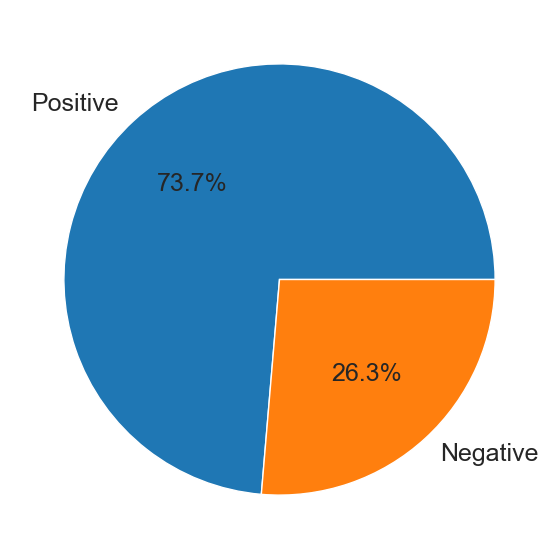

In [53]:
data['Rating'] = data['Rating'].apply(ratings)
plt.pie(data['Rating'].value_counts(), labels=data['Rating'].unique().tolist(), autopct='%1.1f%%')
plt.show()

Exploratory Data Analysis

Counts and Lenght:

Start by checking how long the reviews are:

1. Character count
2. Word count
3. Mean word length
4. Mean sentence length

In [54]:
lenght = len(data['Review'][0])
print(f'Length of a sample review: {lenght}')

Length of a sample review: 593


In [55]:
data['Length'] = data['Review'].str.len()
data.head(10)

Review    Rating  Length
0  nice hotel expensive parking got good deal sta...  Positive     593
1  ok nothing special charge diamond member hilto...  Negative    1689
2  nice rooms not 4* experience hotel monaco seat...  Negative    1427
3  unique, great stay, wonderful time hotel monac...  Positive     600
4  great stay great stay, went seahawk game aweso...  Positive    1281
5  love monaco staff husband stayed hotel crazy w...  Positive    1002
6  cozy stay rainy city, husband spent 7 nights m...  Positive     748
7  excellent staff, housekeeping quality hotel ch...  Positive     597
8  hotel stayed hotel monaco cruise, rooms genero...  Positive     419
9  excellent stayed hotel monaco past w/e delight...  Positive     271

#Word Count: Number of words in a review

In [60]:

word_count = data['Review'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

Word count in a sample review: 87


In [61]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

In [62]:
data['Word_count'] = data['Review'].apply(word_count)
data.head(10)

Review    Rating  Length  \
0  nice hotel expensive parking got good deal sta...  Positive     593   
1  ok nothing special charge diamond member hilto...  Negative    1689   
2  nice rooms not 4* experience hotel monaco seat...  Negative    1427   
3  unique, great stay, wonderful time hotel monac...  Positive     600   
4  great stay great stay, went seahawk game aweso...  Positive    1281   
5  love monaco staff husband stayed hotel crazy w...  Positive    1002   
6  cozy stay rainy city, husband spent 7 nights m...  Positive     748   
7  excellent staff, housekeeping quality hotel ch...  Positive     597   
8  hotel stayed hotel monaco cruise, rooms genero...  Positive     419   
9  excellent stayed hotel monaco past w/e delight...  Positive     271   

   Word_count  
0          87  
1         250  
2         217  
3          89  
4         191  
5         134  
6         101  
7          85  
8          59  
9          35

Mean word length: Average length of words

In [63]:
data['mean_word_length'] = data['Review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data.head(10)

Review    Rating  Length  \
0  nice hotel expensive parking got good deal sta...  Positive     593   
1  ok nothing special charge diamond member hilto...  Negative    1689   
2  nice rooms not 4* experience hotel monaco seat...  Negative    1427   
3  unique, great stay, wonderful time hotel monac...  Positive     600   
4  great stay great stay, went seahawk game aweso...  Positive    1281   
5  love monaco staff husband stayed hotel crazy w...  Positive    1002   
6  cozy stay rainy city, husband spent 7 nights m...  Positive     748   
7  excellent staff, housekeeping quality hotel ch...  Positive     597   
8  hotel stayed hotel monaco cruise, rooms genero...  Positive     419   
9  excellent stayed hotel monaco past w/e delight...  Positive     271   

   Word_count  mean_word_length  
0          87          5.804598  
1         250          5.752000  
2         217          5.571429  
3          89          5.730337  
4         191          5.701571  
5         134          6.470149  
6         101          6.396040  
7          85          6.011765  
8          59          6.084746  
9          35          6.714286

Mean sentence length: Average length of the sentences in the review

In [64]:
np.mean([len(sent) for sent in tokenize.sent_tokenize(data['Review'][0])])

591.0

In [65]:
data['mean_sent_length'] = data['Review'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
data.head(10)


Review    Rating  Length  \
0  nice hotel expensive parking got good deal sta...  Positive     593   
1  ok nothing special charge diamond member hilto...  Negative    1689   
2  nice rooms not 4* experience hotel monaco seat...  Negative    1427   
3  unique, great stay, wonderful time hotel monac...  Positive     600   
4  great stay great stay, went seahawk game aweso...  Positive    1281   
5  love monaco staff husband stayed hotel crazy w...  Positive    1002   
6  cozy stay rainy city, husband spent 7 nights m...  Positive     748   
7  excellent staff, housekeeping quality hotel ch...  Positive     597   
8  hotel stayed hotel monaco cruise, rooms genero...  Positive     419   
9  excellent stayed hotel monaco past w/e delight...  Positive     271   

   Word_count  mean_word_length  mean_sent_length  
0          87          5.804598             591.0  
1         250          5.752000            1687.0  
2         217          5.571429             712.0  
3          89          5.730337             598.0  
4         191          5.701571            1279.0  
5         134          6.470149            1000.0  
6         101          6.396040             746.0  
7          85          6.011765             595.0  
8          59          6.084746             417.0  
9          35          6.714286             269.0

In [66]:
def visualize(col):
    
    print()
    plt.subplot(1,2,1)
    sns.boxplot(y=data[col], hue=data['Rating'])
    plt.ylabel(col, labelpad=12.5)
    
    plt.subplot(1,2,2)
    sns.kdeplot(data[col], hue=data['Rating'])
    plt.legend(data['Rating'].unique())
    plt.xlabel('')
    plt.ylabel('')
    
    plt.show()

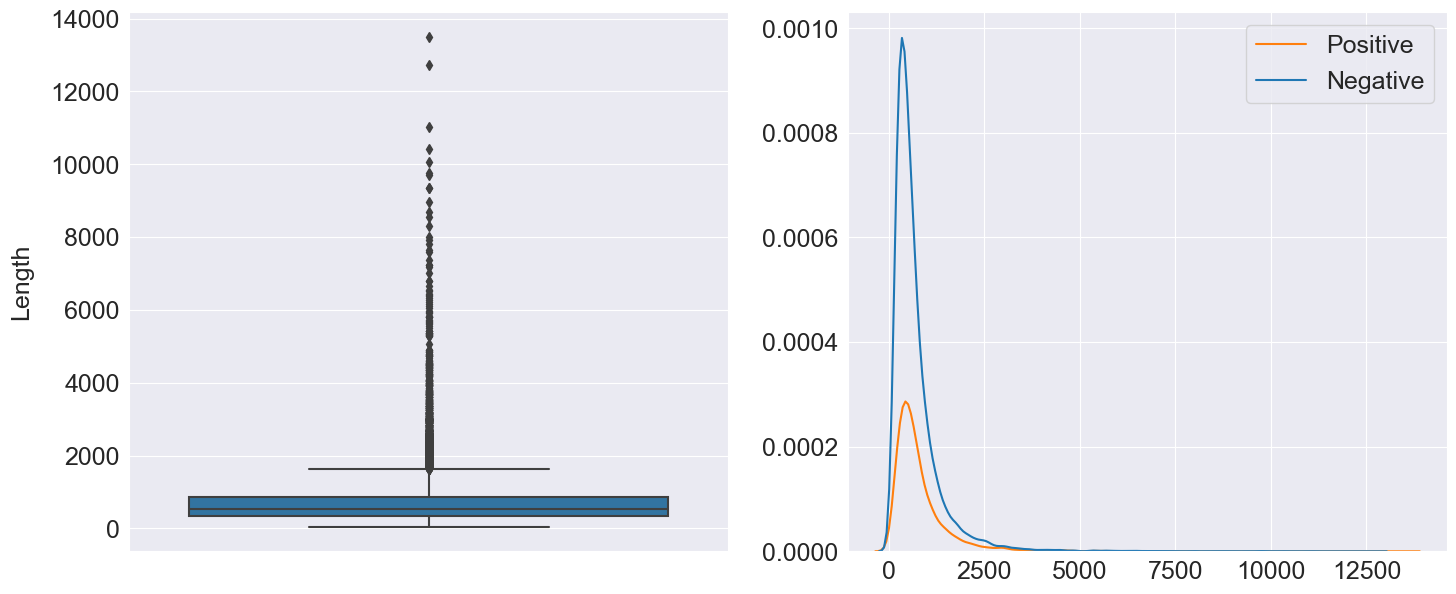

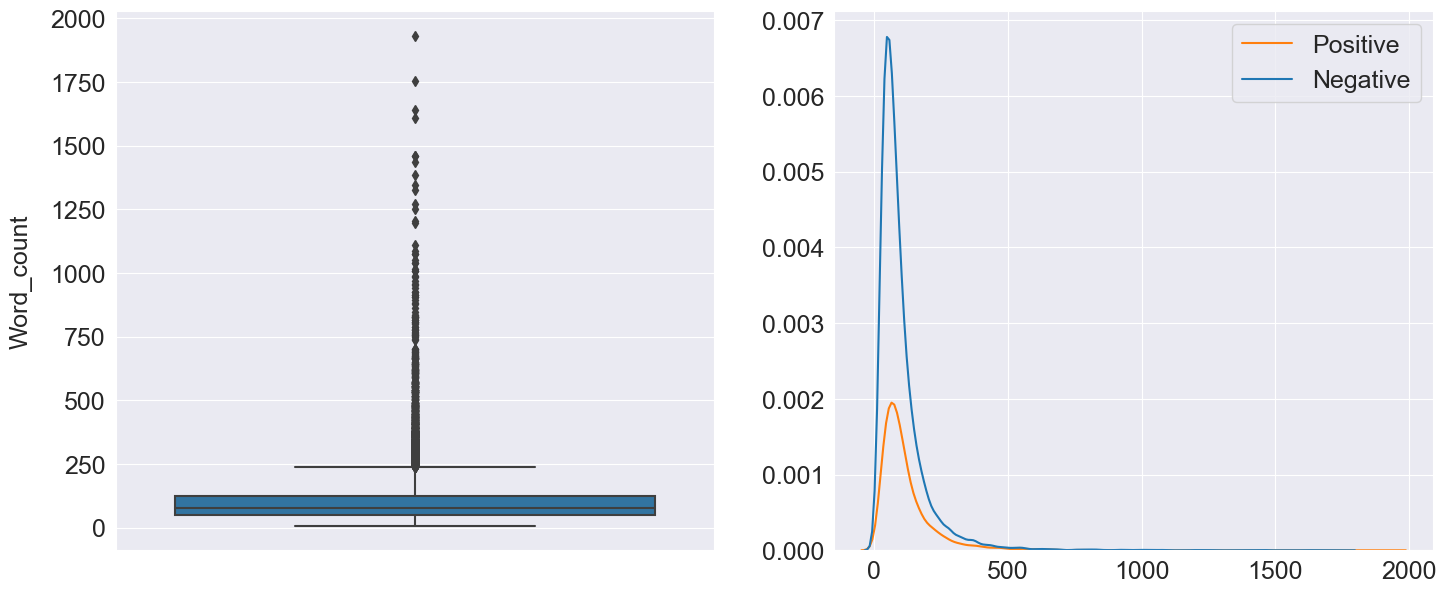

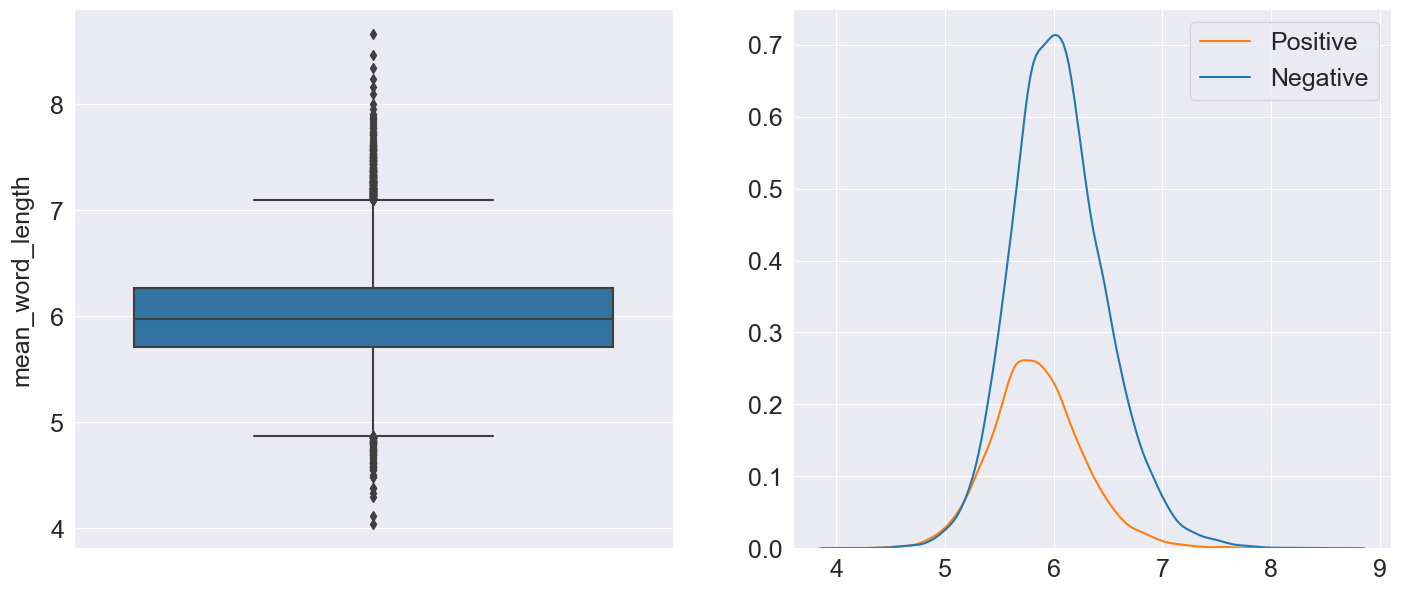

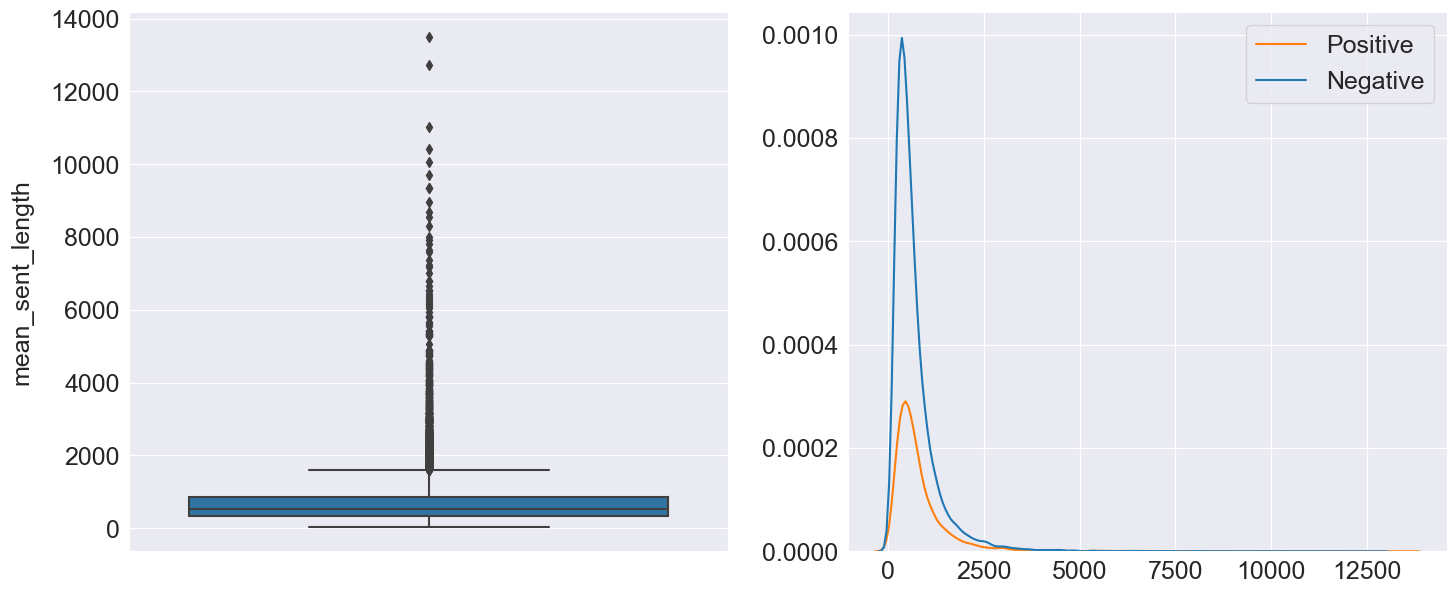

In [67]:
features = data.columns.tolist()[2:]
for feature in features:
    visualize(feature)


https://www.kaggle.com/code/harshsingh2209/complete-guide-to-eda-on-text-data